In [15]:
pip install oneargopy

Note: you may need to restart the kernel to use updated packages.


In [16]:
from oneargopy.OneArgo import Argo

In [17]:
argo = Argo('argo_config.json')

Starting initialize process...
Your current download settings are: 
[DownloadSettings] -> 
Base Directory: ., 
Subdirectories: ['Index', 'Meta', 'Tech', 'Traj', 'Profiles'], 
Index Files: ['ar_index_global_traj.txt', 'ar_index_global_tech.txt', 'ar_index_global_meta.txt', 'ar_index_global_prof.txt', 'argo_synthetic-profile_index.txt'], 
Verbose Setting: True, 
Max Attempts: 5, 
Keep Index In Memory: True, 
Float Type: bgc

Your current source settings are: 
[Source Settings] -> 
Hosts: ['https://data-argo.ifremer.fr/', 'https://usgodae.org/ftp/outgoing/argo/'], 
Available Variables: None, 
Data Assimilation Centers: None

Checking for subdirectories...
The Index directory already exists
The Meta directory already exists
The Tech directory already exists
The Traj directory already exists
The Profiles directory already exists

ar_index_global_traj.txt does not need to be updated yet.
ar_index_global_tech.txt does not need to be updated yet.
ar_index_global_meta.txt does not need to be up

In [5]:
profiles_uswc = argo.select_profiles(lon_lim=[155,170], lat_lim=[-63,-61])

Starting select_profiles...
Validating parameters...
Validating longitude and latitude limits...
Validating start and end dates...
Validating 'type' keyword argument...
Preparing float data for filtering...
Filtering through 19898 floats
There are 3255530 profiles associated with these floats

Sorting floats for those within the geographic range...
Creating point list from profiles...


/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:769: UserWarning: no explicit representation of timezones available for np.datetime64
  self.start_date = np.datetime64(self.start_date)
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:770: UserWarning: no explicit representation of timezones available for np.datetime64
  self.end_date = np.datetime64(self.end_date)


Creating polygon...
16 floats fall within the geographic range
240 profiles associated with those floats
Applying outside=None constraints...
16 floats selected
240 profiles selected according to time and space constraints
Floats Selected: dict_keys([3902129, 5900345, 5901699, 5903722, 5904104, 5904105, 5904483, 5904598, 5905375, 5905379, 5905555, 5906581, 5906582, 5906583, 6902885, 6902891])



/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:1074: UserWarning: no explicit representation of timezones available for np.datetime64
  beginning_of_full_range = np.datetime64(datetime(1995, 1, 1, tzinfo=timezone.utc))
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:1075: UserWarning: no explicit representation of timezones available for np.datetime64
  end_of_full_range = np.datetime64(datetime.now(timezone.utc))


In [6]:
uswc_float_data = argo.load_float_data(profiles_uswc, 'TEMP')

Validating passed floats...
Validating passed 'variables'...
3902129_Sprof.nc does not need to be updated yet.
5900345_Sprof.nc does not need to be updated yet.
5901699_Sprof.nc does not need to be updated yet.
5903722_Sprof.nc does not need to be updated yet.
5904104_Sprof.nc does not need to be updated yet.
5904105_Sprof.nc does not need to be updated yet.
5904483_Sprof.nc does not need to be updated yet.
5904598_Sprof.nc does not need to be updated yet.
5905375_Sprof.nc does not need to be updated yet.
5905379_Sprof.nc does not need to be updated yet.
5905555_Sprof.nc does not need to be updated yet.
5906581_Sprof.nc does not need to be updated yet.
5906582_Sprof.nc does not need to be updated yet.


/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:485: UserWarning: no explicit representation of timezones available for np.datetime64
  netcdf_update_date = np.datetime64(netcdf_update_date)


5906583_Sprof.nc does not need to be updated yet.
6902885_Sprof.nc does not need to be updated yet.
6902891_Sprof.nc does not need to be updated yet.
Loading float data...
Loading Float data from float 3902129 with 2 profiles...
Dropping rows where no measurements were taken for 3902129...
Loading Float data from float 5900345 with 2 profiles...
Dropping rows where no measurements were taken for 5900345...
Loading Float data from float 5901699 with 1 profiles...
Dropping rows where no measurements were taken for 5901699...
Loading Float data from float 5903722 with 3 profiles...
Dropping rows where no measurements were taken for 5903722...
Loading Float data from float 5904104 with 22 profiles...
Dropping rows where no measurements were taken for 5904104...
Loading Float data from float 5904105 with 32 profiles...
Dropping rows where no measurements were taken for 5904105...
Loading Float data from float 5904483 with 4 profiles...
Dropping rows where no measurements were taken for 5904

In [10]:
uswc_temp_200db = uswc_float_data[(abs(uswc_float_data['PRES_ADJUSTED'] - 200) < 0.5) & uswc_float_data['TEMP_ADJUSTED_QC'] == 1]
uswc_temp_200db['TEMP_ADJUSTED'] # subsetting depth to one demension (but weirdly)

281      0.830
1612     1.228
1683     1.386
1934     1.497
2639     1.688
         ...  
93684    0.885
94241    1.154
95355    0.999
95913    0.961
98700    1.090
Name: TEMP_ADJUSTED, Length: 99, dtype: float32

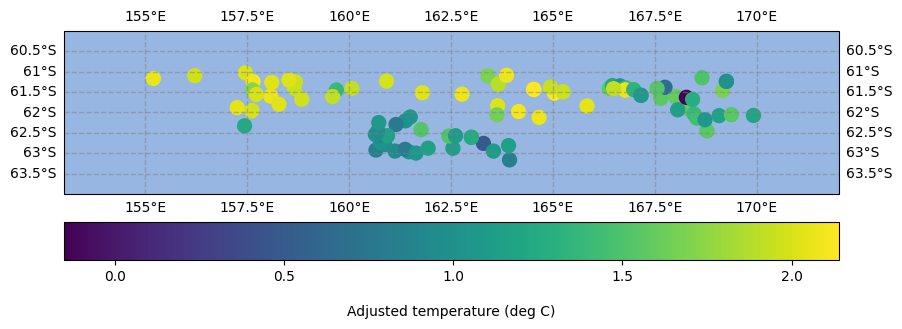

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

sc = ax.scatter(uswc_temp_200db['LONGITUDE'], uswc_temp_200db['LATITUDE'],
           c=uswc_temp_200db['TEMP_ADJUSTED'], cmap='viridis', s=100)

ax.set_extent([153, 172, -60, -64], crs=ccrs.PlateCarree()) # just data region

lat = [-63.164055, -62.79286]
lon = [163.932868, 169.976922]
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.03)
cbar.set_label('Adjusted temperature (deg C)', labelpad=15)

plt.show()

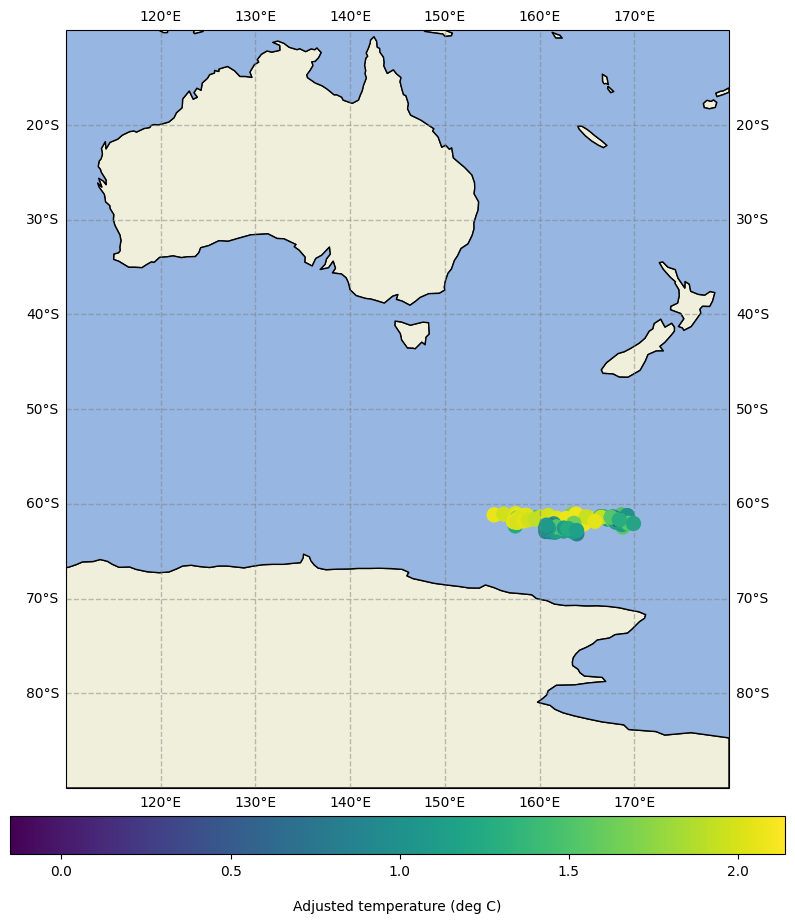

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

sc = ax.scatter(uswc_temp_200db['LONGITUDE'], uswc_temp_200db['LATITUDE'],
           c=uswc_temp_200db['TEMP_ADJUSTED'], cmap='viridis', s=100)

ax.set_extent([110, 180, -10, -90], crs=ccrs.PlateCarree()) # zoomed out so I knew where the data was from
lat = [-63.164055, -62.79286]
lon = [163.932868, 169.976922]
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.03)
cbar.set_label('Adjusted temperature (deg C)', labelpad=15)

plt.show()